In [1]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO
from tracker import Tracker
from detector import Detector
from teams import TeamAffiliation
from keypoint_detector import KeypointDetector
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import utils
from player_position import PlayerPosition

In [2]:
model = YOLO("training/runs/detect/train4/weights/last.pt")
model_keypoints = YOLO("training/runs/pose/train8/weights/best.pt")
detector = Detector(model, 0.5)
keypoint_detector = KeypointDetector(model_keypoints)
tracker = Tracker(detector)
positions = PlayerPosition()

In [3]:
video_path = r"C:\Users\Marcin\Videos\ganzgut.mp4"
images_path = r'data/SoccerNetGS/gamestate-2024/valid/SNGS-021/img1'
frames = utils.load_frames_from_images(images_path)

In [51]:
tracks = tracker.track(frames)


0: 384x640 15 players, 2 referees, 101.0ms
Speed: 4.0ms preprocess, 101.0ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 56.6ms
Speed: 3.0ms preprocess, 56.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 62.5ms
Speed: 3.0ms preprocess, 62.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 51.2ms
Speed: 10.0ms preprocess, 51.2ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 pl

In [53]:
tracks[1]

Detections(xyxy=array([[     54.631,      671.28,      118.24,      847.71],
       [     1030.7,      678.86,        1104,      857.43],
       [     475.04,      366.59,      522.95,      478.51],
       [     1653.4,      407.67,      1701.2,      532.26],
       [     1584.8,      343.61,      1628.9,      449.59],
       [     1461.4,      617.17,      1514.2,      796.09],
       [      762.5,      491.54,      815.17,      638.23],
       [     1003.7,      926.65,      1075.9,      1079.1],
       [     191.28,      449.58,      236.64,      579.61],
       [     621.54,      254.03,      653.16,      345.89],
       [     8.9445,      253.68,      45.372,      346.65],
       [     978.46,      274.25,      1019.4,      400.42],
       [     1699.4,       236.3,      1732.8,      315.85],
       [     990.98,      402.57,      1034.7,      520.07],
       [     229.96,      188.45,       253.2,      252.58],
       [      970.7,      386.77,      1022.2,      501.47],
       [

In [54]:
detections = []
for frame_id, result in enumerate(tracks):
    detections.append({
        "frame_id": frame_id+1,
        "bbox": result.xyxy.tolist(),
        "confidence": result.confidence.tolist(),
        "class_id": result.class_id.tolist(),
        "tracker_id": result.tracker_id.tolist()
    })

In [55]:
detections

[{'frame_id': 1,
  'bbox': [[762.2496948242188,
    491.3291015625,
    814.1802978515625,
    637.822509765625]],
  'confidence': [0.8888387084007263],
  'class_id': [0],
  'tracker_id': [57]},
 {'frame_id': 2,
  'bbox': [[54.63053512573242,
    671.2783203125,
    118.24174499511719,
    847.705322265625],
   [1030.7354736328125,
    678.863525390625,
    1103.9674072265625,
    857.4318237304688],
   [475.0404968261719,
    366.5935363769531,
    522.9483642578125,
    478.5061340332031],
   [1653.423095703125, 407.6745300292969, 1701.2177734375, 532.2611083984375],
   [1584.7650146484375,
    343.6066589355469,
    1628.9007568359375,
    449.58709716796875],
   [1461.3701171875, 617.1681518554688, 1514.186767578125, 796.0916748046875],
   [762.5018310546875, 491.540771484375, 815.1702880859375, 638.234619140625],
   [1003.67724609375, 926.6524658203125, 1075.899169921875, 1079.050048828125],
   [191.275146484375, 449.5760498046875, 236.63693237304688, 579.606201171875],
   [621.53

In [64]:
import json
with open('detections.json', 'w') as f:
    json.dump(detections, f, indent=4)

In [5]:
keypoints = keypoint_detector.detect(frames)


0: 384x640 1 pitch, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 11.6ms
Speed: 1.0ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


In [6]:
keypoints_quick_fix = []
for i, keypoint in enumerate(keypoints):
    keypoints_quick_fix.append(keypoint.keypoints.xy[0].tolist())

In [33]:
keypoints_quick_fix

[[[0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [173.3206787109375, 337.80377197265625],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [1012.276123046875, 253.92233276367188],
  [1008.72998046875, 423.41632080078125],
  [1011.9545288085938, 634.4427490234375],
  [992.5090942382812, 1080.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [730.3547973632812, 516.0060424804688],
  [1288.19287109375, 526.4362182617188]],
 [[0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [187.5245361328125, 342.0400085449219],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [1012.2346801757812, 257.3134765625],
  [1008.90478515625, 425.42999267578125],
  [1012.49755859375, 633.5618896484375],
  [992.5316162109375, 1080.0],


In [57]:
keypoints_json = []
for i, keypoint in enumerate(keypoints_quick_fix):
    keypoints_json.append({
        "frame_id": i+1,
        "keypoints": keypoint
    })

In [58]:
keypoints_json

[{'frame_id': 1,
  'keypoints': [[0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [173.3206787109375, 337.80377197265625],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [1012.276123046875, 253.92233276367188],
   [1008.72998046875, 423.41632080078125],
   [1011.9545288085938, 634.4427490234375],
   [992.5090942382812, 1080.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [730.3547973632812, 516.0060424804688],
   [1288.19287109375, 526.4362182617188]]},
 {'frame_id': 2,
  'keypoints': [[0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [187.5245361328125, 342.0400085449219],
   [0.0, 0.0],
   [0.0, 0.0],
   [0.0, 0.0],
   [1012.2346801757812, 257.3134765625],
   [100

In [63]:
with open('keypoints.json', 'w') as f:
    json.dump(keypoints_json, f, indent=1)

In [17]:
last_valid = None
for i, keypoints in enumerate(keypoints_quick_fix):
    if len(keypoints) == 0:
        keypoints_quick_fix[i] = last_valid
    else:
        last_valid = keypoints

In [18]:
len(keypoints_quick_fix[196])

32

In [19]:
player_positions = positions.get_players_position(keypoints_quick_fix, tracks)

In [20]:
teams = TeamAffiliation(tracks, frames)

In [21]:
player_teams = teams.get_teams()

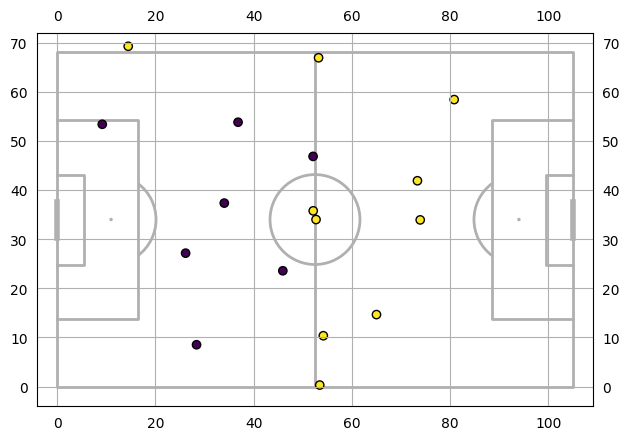

In [24]:
pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()
scatter = pitch.scatter(player_positions[1][:, 0], player_positions[1][:, 1], ax=ax, edgecolor="black", c = player_teams[1])
plt.grid()

In [66]:
player_positions

[array([[     34.599,      47.237],
        [     65.345,      47.364],
        [     44.957,       58.33],
        [     56.908,      54.674],
        [     64.835,      54.625],
        [     52.755,      53.091],
        [     57.982,      46.245],
        [     63.854,      37.227],
        [     32.778,       29.05],
        [     63.761,      16.624],
        [     44.912,      39.059],
        [     36.851,      15.944],
        [     52.809,      19.839],
        [     48.022,      25.644],
        [     42.521,      39.977],
        [     52.822,      33.521],
        [     62.547,      7.1451],
        [     51.204,      46.477],
        [     31.295,       71.86],
        [     64.899,      28.458]]),
 array([[     34.596,      47.164],
        [     65.339,      47.321],
        [     56.907,      54.598],
        [     44.957,      58.281],
        [     64.825,      54.592],
        [     52.733,      53.147],
        [     57.977,      46.207],
        [     63.851,     

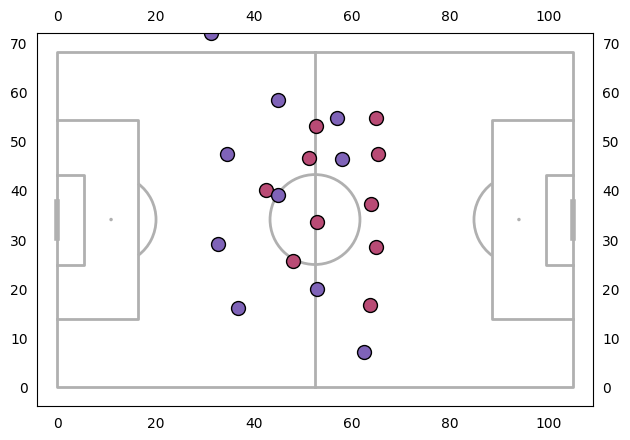

In [10]:
from matplotlib import animation
pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)

def animate(i):
    frame_postions = player_positions[i]
    fame_teams = player_teams[i]
    home_positions = frame_postions[fame_teams == np.int32(0)]
    away_positions = frame_postions[fame_teams == np.int32(1)]
    home.set_data(home_positions[:, 0], home_positions[:, 1])
    away.set_data(away_positions[:, 0], away_positions[:, 1])
    return home, away
    
ani = animation.FuncAnimation(fig, animate, frames=len(player_positions), interval=100, blit=True)
plt.show()

In [25]:
player_positions[0]

array([[     34.599,      47.237],
       [     65.345,      47.364],
       [     44.957,       58.33],
       [     56.908,      54.674],
       [     64.835,      54.625],
       [     52.755,      53.091],
       [     57.982,      46.245],
       [     63.854,      37.227],
       [     32.778,       29.05],
       [     63.761,      16.624],
       [     44.912,      39.059],
       [     36.851,      15.944],
       [     52.809,      19.839],
       [     48.022,      25.644],
       [     42.521,      39.977],
       [     52.822,      33.521],
       [     62.547,      7.1451],
       [     51.204,      46.477],
       [     31.295,       71.86],
       [     64.899,      28.458]])

In [11]:
# plt.rcParams['animation.ffmpeg_path'] = ''

In [12]:
# ani.save('animation.mp4', fps=30)

In [25]:
dict_to_save = {'frame': [], 'track_id': [], 'x': [], 'y': [], 'team': []}
frame_id = 1
for frame_positions, frame_tracks, frame_teams in zip(player_positions, tracks, player_teams):
    dict_to_save['frame'] += [frame_id for _ in frame_positions]
    dict_to_save['track_id'] += frame_tracks.tracker_id.tolist()
    dict_to_save['x'] += frame_positions[:,0].tolist()
    dict_to_save['y'] += frame_positions[:,1].tolist()
    dict_to_save['team'] += frame_teams
    frame_id += 1
    

In [32]:
dict_to_save

{'frame': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11

In [26]:
pd.DataFrame(dict_to_save).to_csv('positions_valid_021.csv', index=False)

In [27]:
df = pd.read_csv('positions_valid_021.csv')

In [32]:
df[df['track_id']==12]

frame  track_id          x          y  team
11        1        12  52.191868  46.600467     0
28        2        12  52.109619  46.851829     0
44        3        12  52.065089  46.769368     0
61        4        12  52.067683  46.670343     0
77        5        12  52.258675  46.766143     0
...     ...       ...        ...        ...   ...
4929    333        12  79.483160  33.778391     0
4944    334        12  78.888704  34.672286     0
4956    335        12  77.223482  34.089780     0
4972    336        12  78.335199  32.701134     0
4993    337        12  78.681457  31.467128     0

[337 rows x 5 columns]